In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [5]:
data.shape

(7920, 3)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [10]:
import re
import string

In [12]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

### Convert UPPERCASE to lowercase

In [14]:
data["tweet"] = data["tweet"].apply (lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

### Remove Links

In [18]:
data["tweet"] = data["tweet"].apply(
    lambda text: re.sub(r"\s+", " ",
        re.sub(r"http\S+|www\S+", "", text)
    ).strip()
)


In [19]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test #android #apps #b...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

### Remove punctuations

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [22]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

### Remove Numbers


In [23]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app mobil...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [26]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)

In [27]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app mobil...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### Remove Stopwords

In [29]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.4 MB/s  0:00:01m 1.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [nltk]━━━━━━━━━━━━━ 2/3 [nltk]


In [30]:
import nltk

In [32]:
nltk.download('stopwords',download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [34]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [36]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [37]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

### Stemming

In [42]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()


In [43]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [44]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [45]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Bulding vocabulary

In [50]:
from collections import Counter
vocab = Counter()

In [51]:
vocab

Counter()

In [55]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [56]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 756,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 456,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 383,
         'io': 383,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 283,
         'got': 280,
         'fun': 277,
         'news': 265,
         'music': 264,
         'thank': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [57]:
len(vocab)

15896

In [58]:
data.shape

(7920, 3)

In [59]:
tokens = [key for key in vocab if vocab[key] > 10]

In [61]:
len(tokens)

1146

In [62]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

# divide dataset to traing and test

In [67]:
x = data['tweet']
y = data['label']

In [68]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [69]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [71]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 3.3 MB/s  0:00:02a 0:00:010:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 2.6 MB/s  0:00:07 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]━━━━━ 2/3 [scikit-learn]


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [78]:
X_train.shape

(6336,)

In [79]:
X_test.shape

(1584,)

In [80]:
y_test

7684    0
6997    0
7083    0
5235    0
7463    0
       ..
4381    1
5465    1
1232    0
7618    1
2306    0
Name: label, Length: 1584, dtype: int64

In [81]:
y_train

2269    0
2897    0
5511    1
4159    0
4271    0
       ..
4513    0
7736    0
5901    0
7348    0
7390    0
Name: label, Length: 6336, dtype: int64

In [82]:
X_train

2269    new weapon camera samsung opticalzoom bestbuy ...
2897    slipcov rhyme hover cover plover glover start ...
5511    ahhhhh hatey macbookpro appl viru anybodi know...
4159    bright makeup brighten cloudi dayyy instap smi...
4271     true instas friend weirdo talk life live iphone…
                              ...                        
4513    poolsid dann lollipop suck lick appl cherri sw...
7736    girlwiththecak mine work foley go att store ge...
5901    favorit new appl emoji even differ nation io m...
7348    happi holiday nofilt villag holiday famili ban...
7390    love homescreen tribal floradesign homescreen ...
Name: tweet, Length: 6336, dtype: object

In [83]:
X_test

7684    current statu shaki maze lite review submit ap...
6997    got anoth one piccollag iphon hate appl watch ...
7083                  ps selfi ps playstat soni goodnight
5235    yeah note gear samsung note galaxi smartphon g...
7463    mighti impress samsung followup especi mail wr...
                              ...                        
4381         feel like mac break time goe byebyegradmoney
5465     ef iphon po updat comput refus download need fro
1232    top gearapp avail us itun store need us credit...
7618         want throw phone window know id regret later
2306    pc exquisit squishi random charm iphon strap t...
Name: tweet, Length: 1584, dtype: object

# vectorization

In [89]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new
            
        

In [90]:
vectorized_x_train = vectorizer(X_train, tokens)

In [95]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1146), dtype=float32)

In [93]:
vectorized_x_test = vectorizer(X_test, tokens)

In [94]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1146), dtype=float32)

### For training

In [96]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1146), dtype=float32)

In [97]:
y_train

2269    0
2897    0
5511    1
4159    0
4271    0
       ..
4513    0
7736    0
5901    0
7348    0
7390    0
Name: label, Length: 6336, dtype: int64

### For testing

In [98]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1146), dtype=float32)

In [99]:
y_test

7684    0
6997    0
7083    0
5235    0
7463    0
       ..
4381    1
5465    1
1232    0
7618    1
2306    0
Name: label, Length: 1584, dtype: int64

In [101]:
y_train.value_counts()

label
0    4735
1    1601
Name: count, dtype: int64

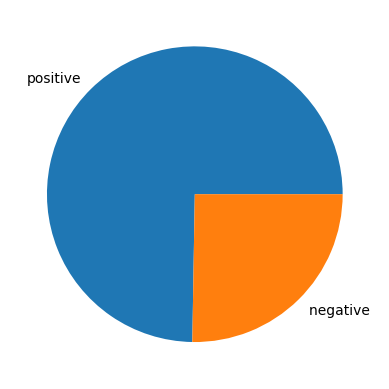

In [104]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['positive', 'negative '])
plt.show()


## Handle imbalanced dataset

In [107]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imbalanced-learn]


In [108]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9470, 1146) (9470,)


In [110]:
y_train_smote.value_counts()

label
0    4735
1    4735
Name: count, dtype: int64

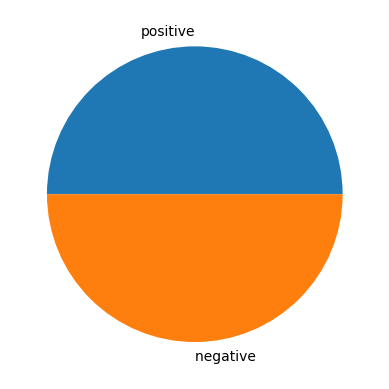

In [111]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['positive', 'negative '])
plt.show()

### Final Training dataset

In [112]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9470, 1146), dtype=float32)

In [113]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9465    1
9466    1
9467    1
9468    1
9469    1
Name: label, Length: 9470, dtype: int64

### Final Testing dataset

In [114]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1146), dtype=float32)

In [115]:
y_test

7684    0
6997    0
7083    0
5235    0
7463    0
       ..
4381    1
5465    1
1232    0
7618    1
2306    0
Name: label, Length: 1584, dtype: int64

# Model Training and evaluation

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [118]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act,y_pred):
    acc = round(accuracy_score(y_act, y_pred,), 3)
    pr = round(precision_score(y_act, y_pred,), 3)
    rec = round(recall_score(y_act, y_pred,), 3)
    f1 = round(f1_score(y_act, y_pred,), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-score = {f1}')

def validation_scores(y_act,y_pred):
    acc = round(accuracy_score(y_act, y_pred,), 3)
    pr = round(precision_score(y_act, y_pred,), 3)
    rec = round(recall_score(y_act, y_pred,), 3)
    f1 = round(f1_score(y_act, y_pred,), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-score = {f1}')

### Logistic Regression

In [119]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [120]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [121]:
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], shape=(9470,))

In [122]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9465    1
9466    1
9467    1
9468    1
9469    1
Name: label, Length: 9470, dtype: int64

In [123]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.919
	Recall = 0.967
	F1-score = 0.942


In [124]:
y_test_pred = lr.predict(vectorized_x_test)

In [125]:
y_test_pred

array([0, 1, 0, ..., 1, 1, 0], shape=(1584,))

In [126]:
y_test

7684    0
6997    0
7083    0
5235    0
7463    0
       ..
4381    1
5465    1
1232    0
7618    1
2306    0
Name: label, Length: 1584, dtype: int64

In [127]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.868
	Precision = 0.72
	Recall = 0.831
	F1-score = 0.772


In [128]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.919
	Recall = 0.967
	F1-score = 0.942
Testing Scores:
	Accuracy = 0.868
	Precision = 0.72
	Recall = 0.831
	F1-score = 0.772


### Multinomial Naive Bayes

In [129]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.911
	Precision = 0.872
	Recall = 0.964
	F1-score = 0.916
Testing Scores:
	Accuracy = 0.86
	Precision = 0.68
	Recall = 0.904
	F1-score = 0.776


### Decision Tree Classifier

In [130]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-score = 1.0
Testing Scores:
	Accuracy = 0.823
	Precision = 0.668
	Recall = 0.673
	F1-score = 0.671


### Random Forest Classifier

In [132]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-score = 1.0
Testing Scores:
	Accuracy = 0.866
	Precision = 0.764
	Recall = 0.722
	F1-score = 0.742


### Support Vector Machine

In [133]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.98
	Precision = 0.964
	Recall = 0.996
	F1-score = 0.98
Testing Scores:
	Accuracy = 0.876
	Precision = 0.754
	Recall = 0.8
	F1-score = 0.776


### Save Model using pickle

In [135]:
import pickle
with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)